## DECISION TREE
### Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
### Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


In [1]:
import pandas as pd

In [2]:
details = pd.read_excel('heart_disease.xlsx', sheet_name=0)
details

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [3]:
df = pd.read_excel('heart_disease.xlsx', sheet_name=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
num_cols = df.select_dtypes(include=['number']).columns

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        # make all values uniform strings (lowercase, stripped) so encoder sees a single type
        df[column] = df[column].astype(str).str.strip().str.lower()
        df[column] = le.fit_transform(df[column])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.5,2,1,4
904,62,1,0,166,170,False,2,120,1,3.0,1,2,4
905,56,1,2,170,0,False,0,123,1,2.5,0,2,4
906,56,1,2,144,208,True,2,105,2,NaN,0,2,4


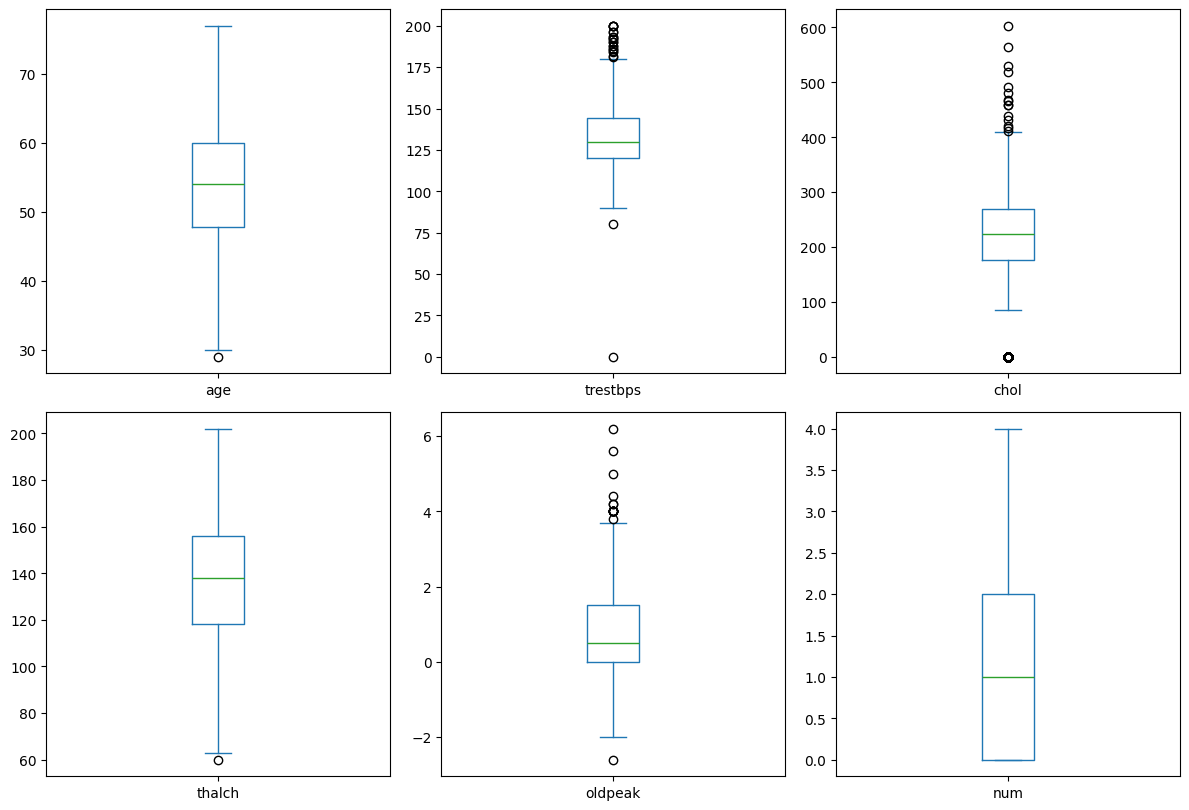

In [9]:
import matplotlib.pyplot as plt
df[num_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(12,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()
# as this is a medical dataset, we will not be removing outliers

In [10]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: >

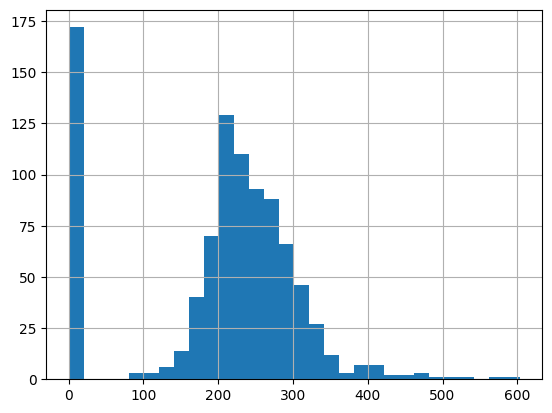

In [13]:
df['chol'].hist(bins=30)

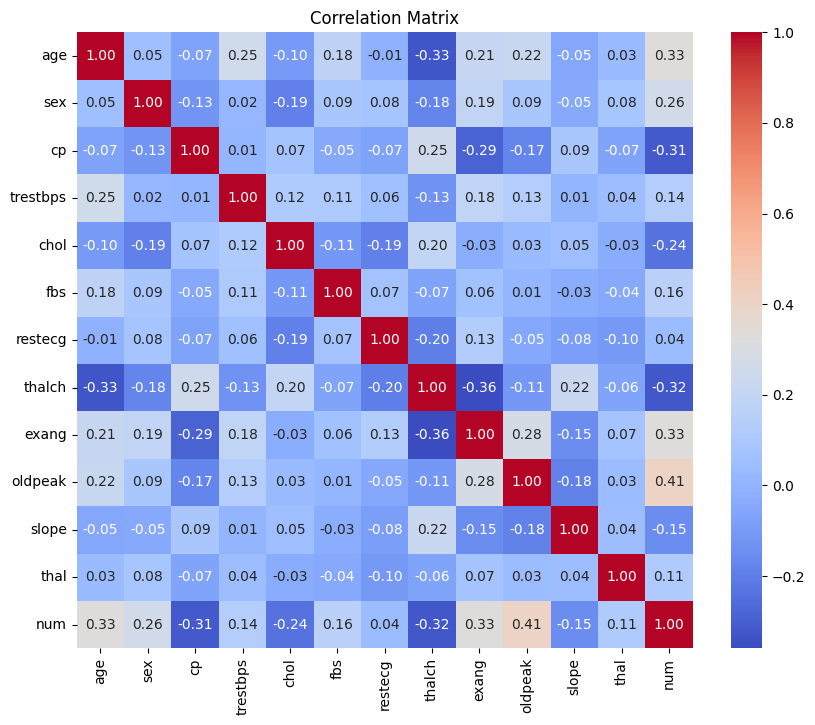

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
y_proba = dt.predict_proba(X_test)
print("ROC AUC Score (ovr, weighted):", roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))

Accuracy: 0.521978021978022
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.36      0.35      0.36        48
           2       0.42      0.50      0.46        22
           3       0.18      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.51      0.52      0.52       182

Confusion Matrix:
 [[64 14  6  5  0]
 [17 17  6  8  0]
 [ 3  6 11  1  1]
 [ 4  7  1  3  2]
 [ 1  3  2  0  0]]
Precision: 0.5146670023920433
Recall: 0.521978021978022
F1 Score: 0.5179246192404087
ROC AUC Score (ovr, weighted): 0.65582912964503


In [19]:
# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [22]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [28]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
y_proba = dt.predict_proba(X_test)
print("ROC AUC Score (ovr, weighted):", roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))


Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182

Confusion Matrix:
 [[76 10  0  3  0]
 [19 24  0  5  0]
 [ 5 12  0  5  0]
 [ 5  8  0  4  0]
 [ 2  2  0  2  0]]
Precision: 0.4800292813784487
Recall: 0.5714285714285714
F1 Score: 0.521714462059831
ROC AUC Score (ovr, weighted): 0.7847437892010896


C:\Users\Dinesh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dinesh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dinesh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

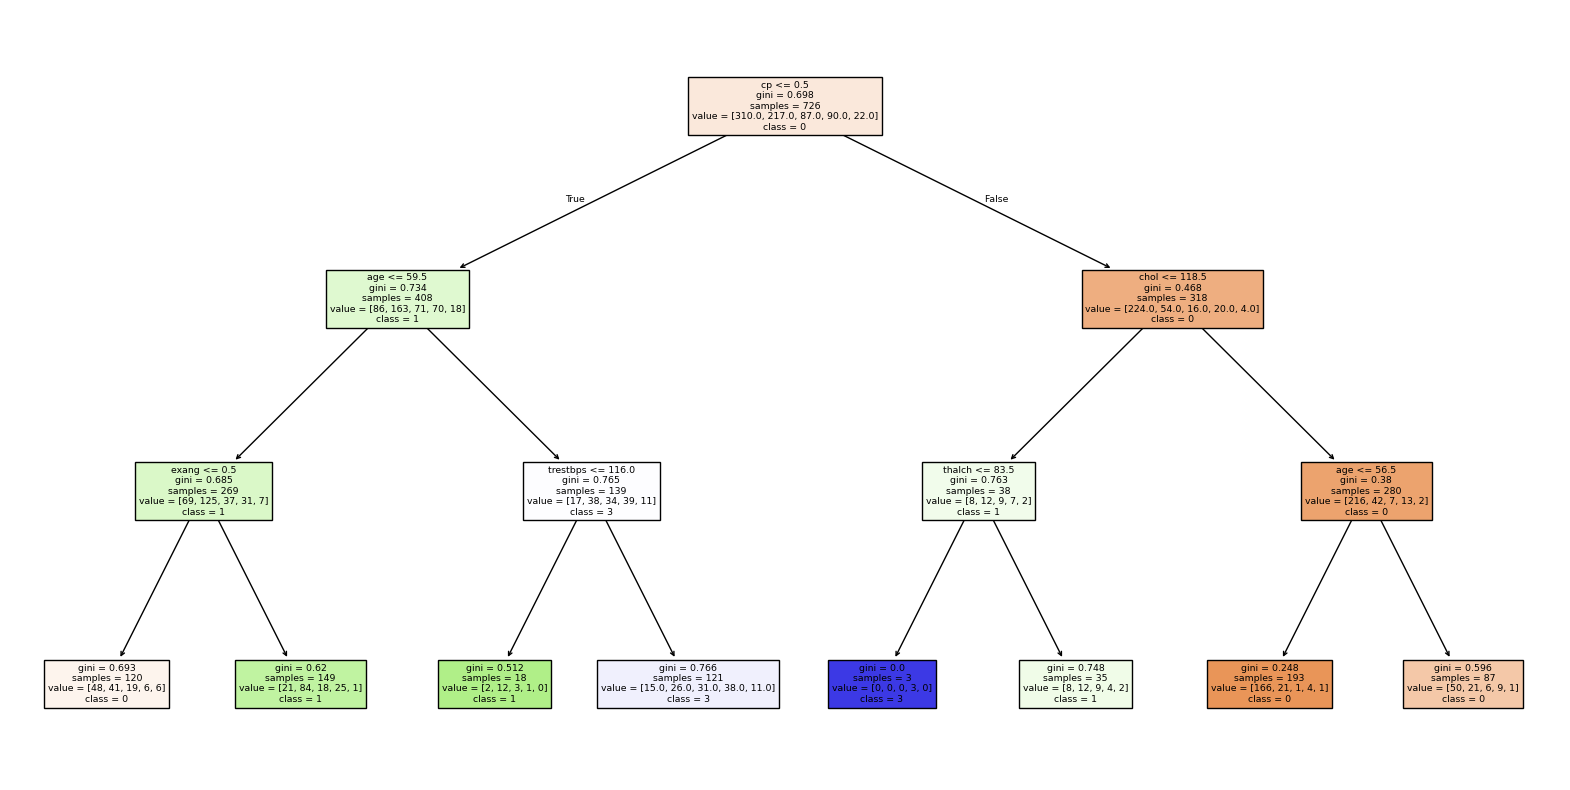

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plt.title("Decision Tree")
plot_tree(dt, 
          filled=True, 
          feature_names=X.columns,
          class_names=[str(i) for i in dt.classes_])
plt.show()

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
### Some common hyperparameters of decision tree models include:
- <b>max_depth:</b> Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but may lead to overfitting.
- <b>min_samples_split:</b> The minimum number of samples required to split an internal node. A higher value can prevent overfitting by making the tree more generalized.
- <b>criterion:</b> The function used to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain). The choice of criterion can affect how the tree splits the data.

## 2. What is the difference between the Label encoding and One-hot encoding?
Label encoding converts categorical variables into numerical format by assigning a unique integer to each category. One-hot encoding, creates binary columns for each category, indicating the presence or absence of that category in the data. Label encoding is more memory efficient but can introduce ordinal relationships that may not exist, while one-hot encoding avoids this issue but can lead to a high-dimensional feature space.